In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
dataset=pd.read_csv("car_details.csv")
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
dataset.shape

(4340, 8)

In [4]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Performing Data Analysis


In [6]:
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes != 'o']
dataset[numerical_feature].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
dataset[numerical_feature].columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
dataset['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

Text(0.5, 1.0, 'year sold vs selling_price')

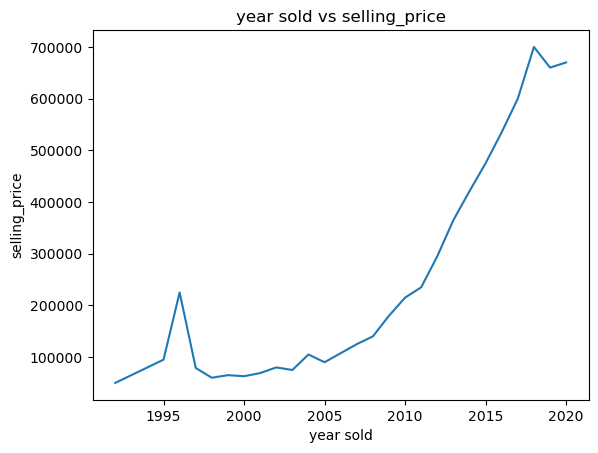

In [9]:
dataset.groupby('year')['selling_price'].median().plot()
plt.xlabel('year sold')
plt.ylabel('selling_price')
plt.title('year sold vs selling_price')

Text(0.5, 1.0, 'year sold vs selling_price')

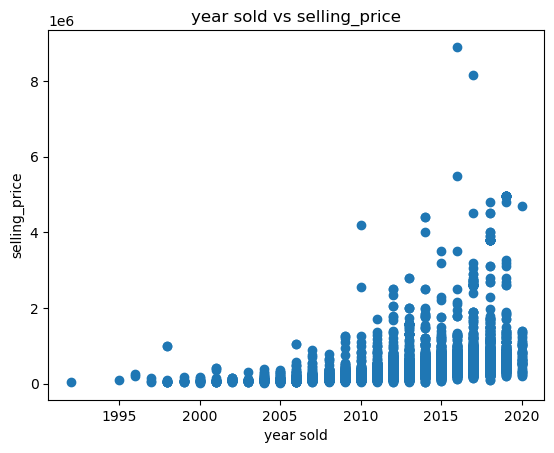

In [10]:
plt.scatter(dataset['year'],dataset['selling_price'])
plt.xlabel('year sold')
plt.ylabel('selling_price')
plt.title('year sold vs selling_price')

In [11]:
discrete_features=[feature for feature in numerical_feature if (len(dataset[feature].unique())<25 and feature not in dataset['year'] )]
discrete_features

['fuel', 'seller_type', 'transmission', 'owner']

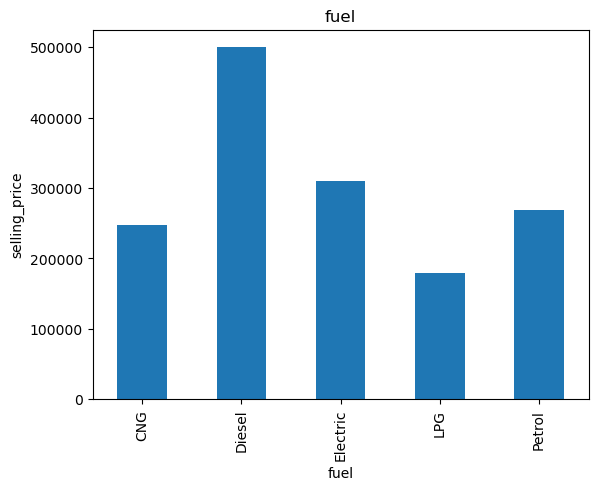

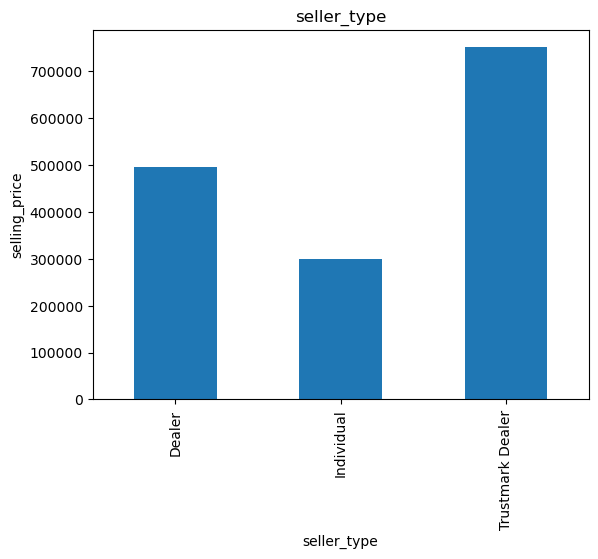

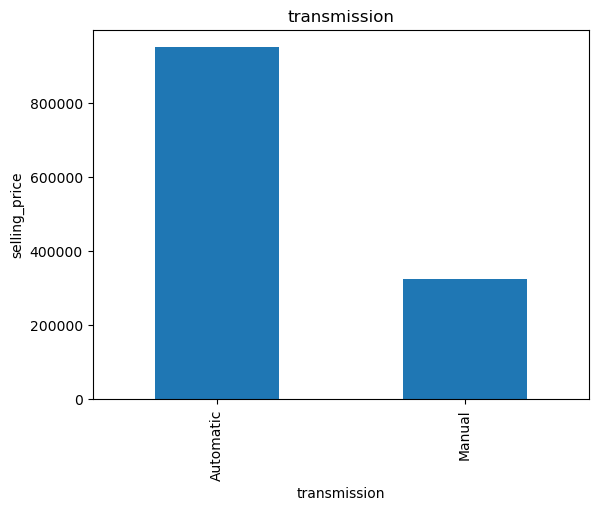

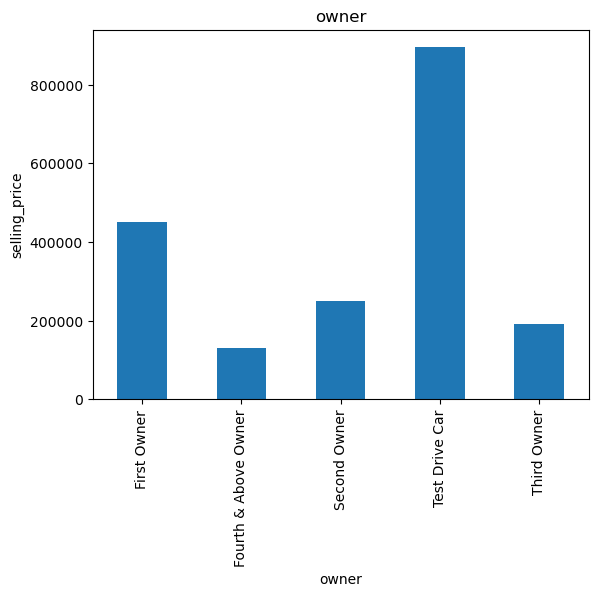

In [12]:
for feature in discrete_features:
    data=dataset.copy()
    dataset.groupby(feature)['selling_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(feature)
    plt.show()

In [13]:
continous_features=[feature for feature in numerical_feature if feature not in discrete_features+['year'] ]
continous_features

['name', 'selling_price', 'km_driven']

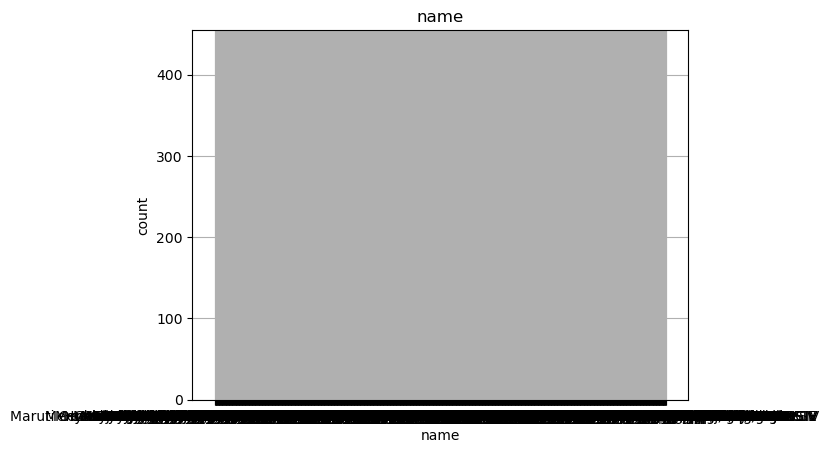

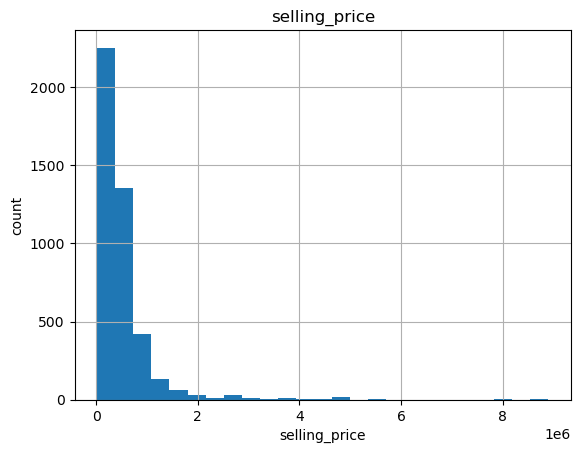

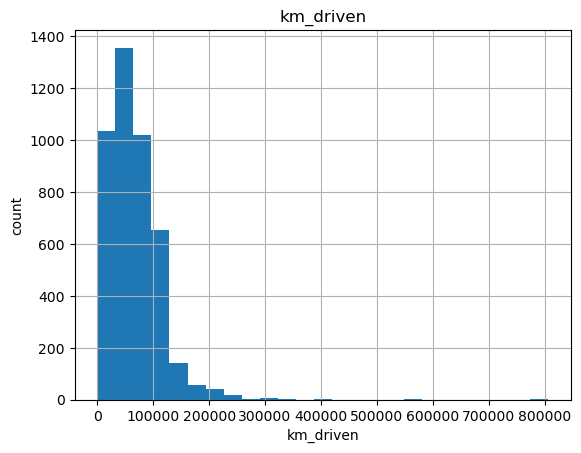

In [14]:
for feature in continous_features:
    data=dataset.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [15]:
dataset[continous_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 101.8+ KB


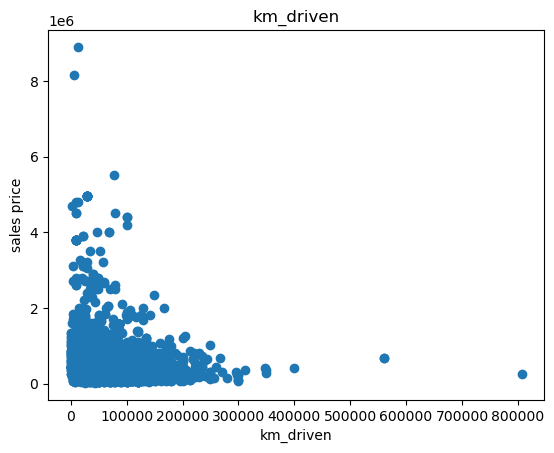

In [16]:
plt.scatter(dataset['km_driven'],dataset['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('sales price')
plt.title('km_driven')
plt.show()

In [17]:
continous_features.remove("name")

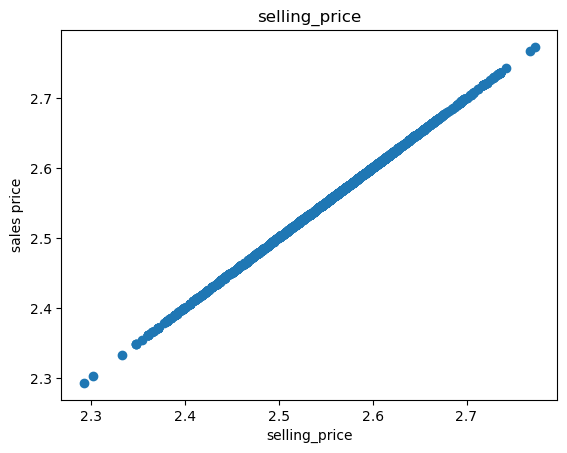

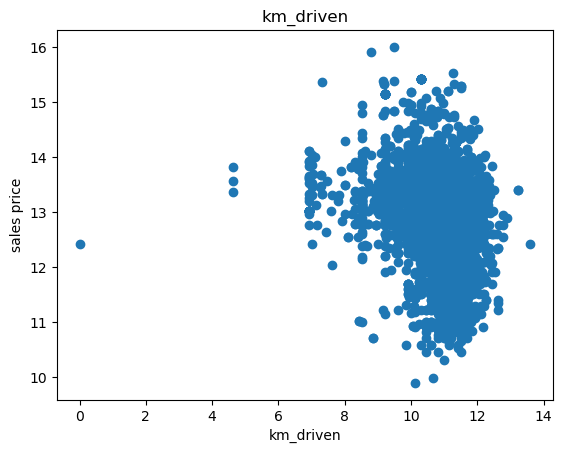

In [18]:
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['selling_price']=np.log(data['selling_price'])
        plt.scatter(data[feature],data['selling_price'])
        plt.xlabel(feature)
        plt.ylabel('sales price')
        plt.title(feature)
        plt.show()
        

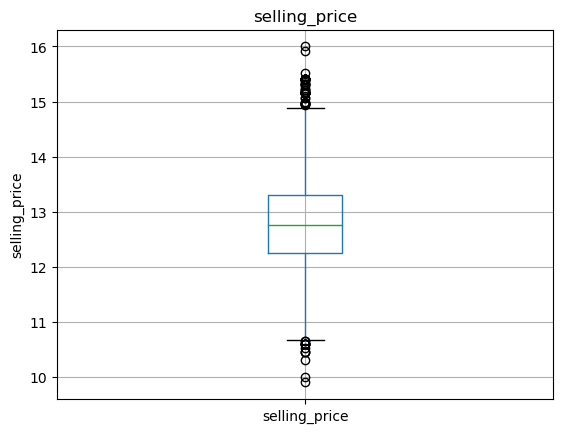

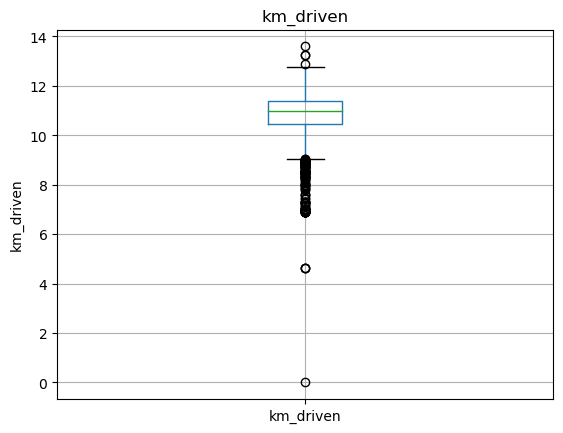

In [19]:
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [20]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
categorical_features

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [21]:
dataset[categorical_features]

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,Diesel,Individual,Manual,First Owner


In [22]:
#categorical_features.remove("name")

In [23]:
for feature in categorical_features:
    print(feature,' ',len(dataset[feature].unique()))

name   1491
fuel   5
seller_type   3
transmission   2
owner   5


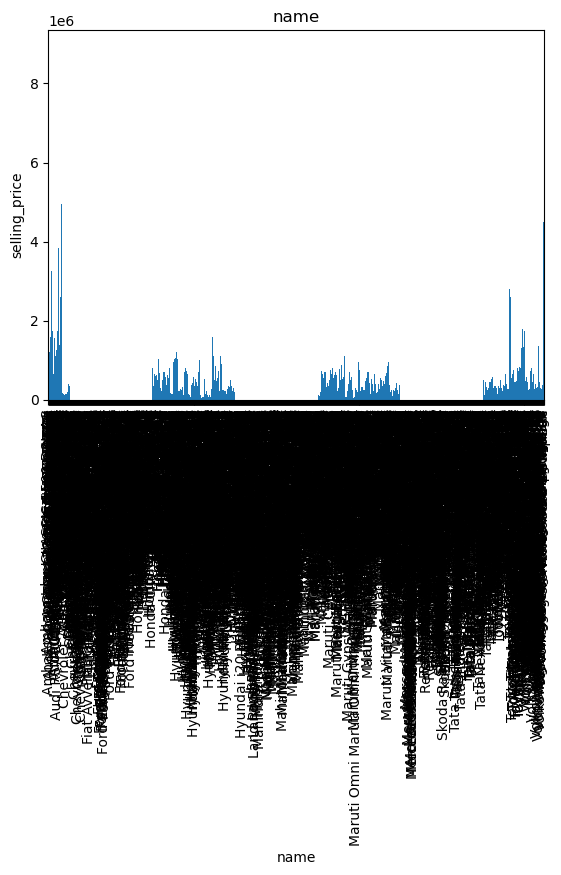

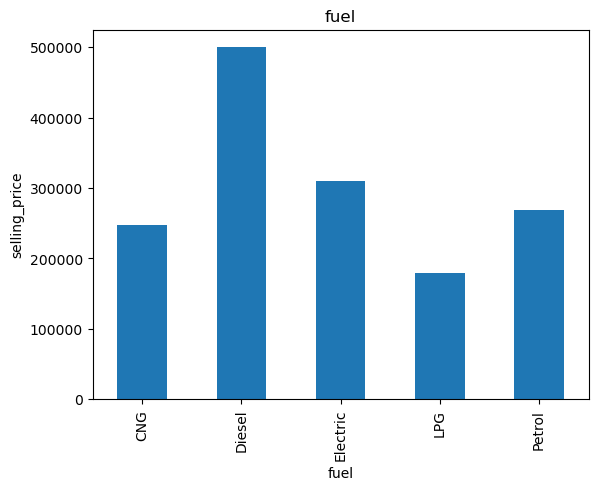

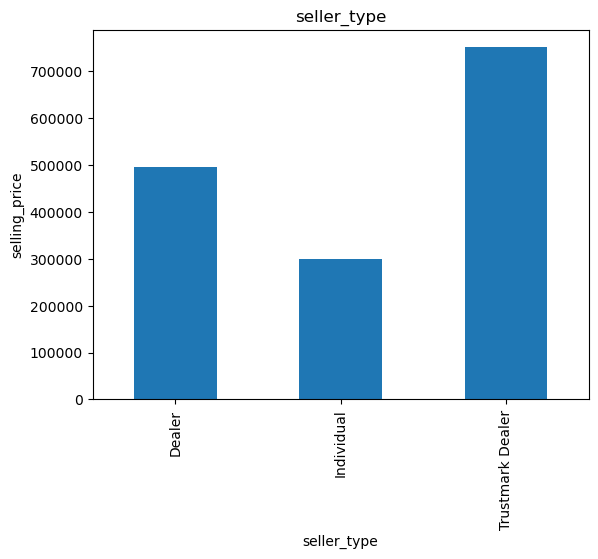

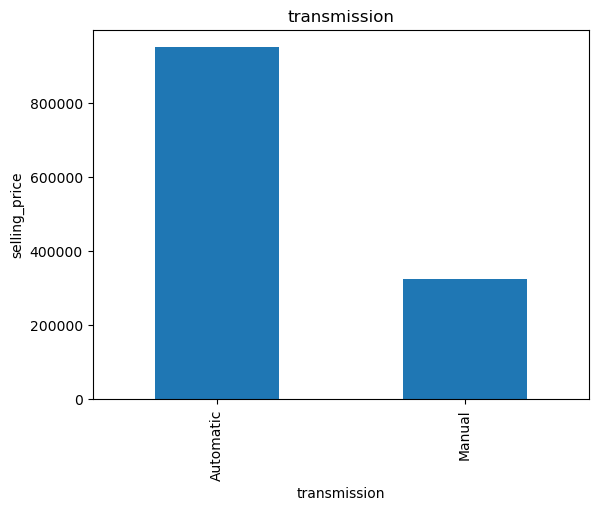

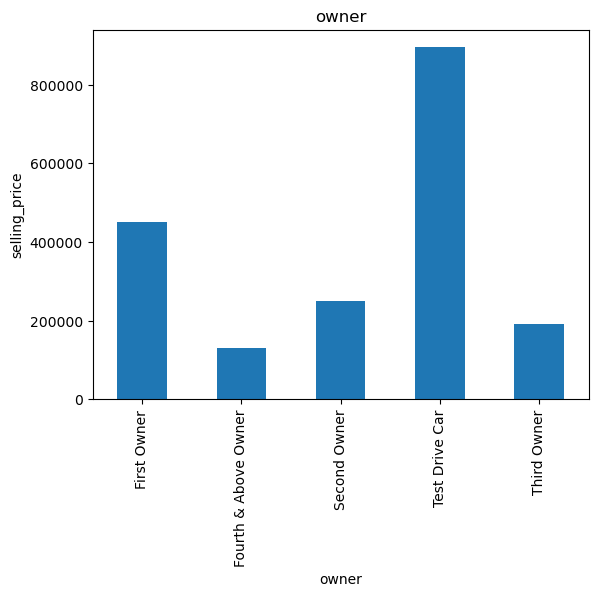

In [24]:
for feature in categorical_features:
    data=dataset.copy()
    dataset.groupby(feature)['selling_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(feature)
    plt.show()

In [25]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [26]:
dataset.drop(columns=['name'],inplace=True)

# Handling Temporial Data(year)

In [27]:
dataset['present_year']=2020
dataset['new_year']=dataset['present_year']-dataset['year']
dataset=dataset.drop(columns=['year','present_year'])

In [28]:
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,new_year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


# Scaling Numerical Features

In [29]:
num_features=['selling_price','km_driven']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [30]:
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,new_year
0,11.002100,11.156251,Petrol,Individual,Manual,First Owner,13
1,11.813030,10.819778,Petrol,Individual,Manual,First Owner,13
2,13.304685,11.512925,Diesel,Individual,Manual,First Owner,8
3,12.429216,10.736397,Petrol,Individual,Manual,First Owner,3
4,13.017003,11.856515,Diesel,Individual,Manual,Second Owner,6


# Scaling categorical Features

In [31]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['fuel', 'seller_type', 'transmission', 'owner']

In [32]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['selling_price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [33]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['selling_price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [34]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['selling_price'] ]
len(scaling_feature)

6

In [35]:
scaling_feature

['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'new_year']

In [36]:
feature_scale=[feature for feature in dataset.columns if feature not in ['selling_price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [37]:
scaler.transform(dataset[feature_scale])

array([[0.82027744, 0.5       , 0.        , 0.        , 0.75      ,
        0.46428571],
       [0.79553789, 0.5       , 0.        , 0.        , 0.75      ,
        0.46428571],
       [0.84650242, 1.        , 0.        , 0.        , 0.75      ,
        0.28571429],
       ...,
       [0.8328023 , 0.5       , 0.        , 0.        , 0.5       ,
        0.39285714],
       [0.83875565, 1.        , 0.        , 0.        , 0.75      ,
        0.14285714],
       [0.77913098, 0.5       , 0.        , 0.        , 0.75      ,
        0.14285714]])

In [38]:
data = pd.concat([dataset[['selling_price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [39]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,new_year
0,11.002100,0.820277,0.5,0.0,0.0,0.75,0.464286
1,11.813030,0.795538,0.5,0.0,0.0,0.75,0.464286
2,13.304685,0.846502,1.0,0.0,0.0,0.75,0.285714
3,12.429216,0.789407,0.5,0.0,0.0,0.75,0.107143
4,13.017003,0.871765,1.0,0.0,0.0,0.50,0.214286


# Preparing Data For Test And Train
### Here Using "data" for Train And Test Data We Got 68.23% for Linear Regression and 75.05% Using Random Forest Regressor
### Here Using "dataset" for Train And Test Data We Got 68.25% for Linear Regression and 90.11% Using Random Forest Regressor

In [40]:
y=dataset[['selling_price']].copy()
x=dataset.drop(['selling_price'],axis=1).copy()

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0) # random_state=0

In [42]:
x_train.shape,x_test.shape

((3038, 6), (1302, 6))

In [43]:
y_train.shape,y_test.shape

((3038, 1), (1302, 1))

# Using Lasso Technique To Select Best Features

In [44]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [45]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True])

In [46]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 6
selected features: 6


In [47]:
selected_feat

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'new_year'],
      dtype='object')

In [48]:
x_train=x_train[selected_feat]
x_test=x_test[selected_feat]

In [49]:
x_train.head()

,km_driven,fuel,seller_type,transmission,owner,new_year
330,11.695247,2,0,0,1,12
3022,10.799576,1,0,0,3,5
2497,11.289782,1,0,0,3,16
2078,10.986292,1,1,0,3,6
1837,10.870471,2,0,0,3,4


# Using Linear Regression

In [50]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred= model.predict(x_test)  
x_pred= model.predict(x_train)

In [52]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.3635704312096986
Mean Square Error: 0.22243254724822314
Root Mean Square Error: 0.47162755140918466


In [53]:
r2_score(y_train, x_pred)

0.6825567982283098

In [54]:
import statsmodels.api as sm
simple=sm.OLS(y_train,x_train.astype(float)).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          8.215e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:39:51   Log-Likelihood:                         -4308.1
No. Observations:                3038   AIC:                                      8628.
Df Residuals:                    3032   BIC:                                      8664.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
km_driven        1.0489      0.010    100.088      0.000       1.028       1.069
fuel             0.3220      0.036      8.861      0.000       0.251       0.393
seller_type      0.3321      0.039      8.512      0.000       0.256       0.409
transmission     0.9618      0.061     15.823      0.000       0.843       1.081
owner            0.6553      0.027     24.541      0.000       0.603       0.708
new_year        -0.1418      0.005    -25.917      0.000      -0.153      -0.131
==============================================================================
Omnibus:                     1042.189   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8495.596
Skew:                           1.398   Prob(JB):                         0.00
Kurtosis:                      10.700   Cond. No.                         45.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

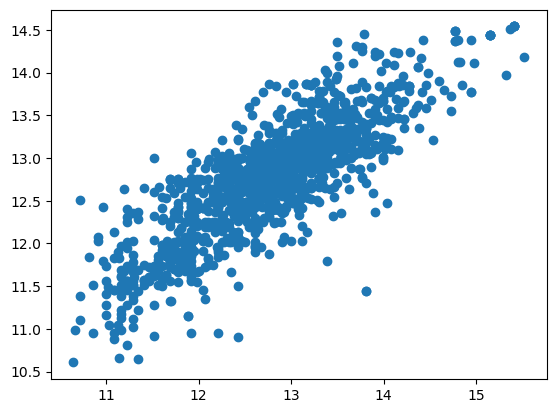

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [[13.72994594]
 [13.84043799]
 [12.41801421]
 ...
 [11.83646842]
 [12.36637814]
 [12.59196263]]


# Using Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [58]:
y_pred2= model2.predict(x_test)  
x_pred2= model2.predict(x_train)

In [59]:
mae = metrics.mean_absolute_error(y_test, y_pred2)
mse = metrics.mean_squared_error(y_test, y_pred2)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.32778355979929774
Mean Square Error: 0.21014257058602398
Root Mean Square Error: 0.45841310036475175


In [60]:
r2_score(y_train, x_pred2)

0.9009513882630886

In [61]:
print("Prediction for test set: {}".format(y_pred2))

Prediction for test set: [13.38060842 14.27293541 12.23644898 ... 11.92340515 12.62055018
 12.55491063]


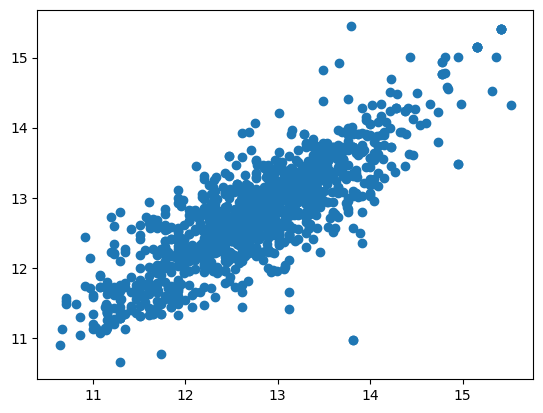

In [62]:
plt.scatter(y_test,y_pred2)


# Using XGBoost Regressor

In [63]:
from xgboost import XGBRegressor
model3=  XGBRegressor()
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
y_pred3= model3.predict(x_test)  
x_pred3= model3.predict(x_train)

In [65]:
mae = metrics.mean_absolute_error(y_test, y_pred3)
mse = metrics.mean_squared_error(y_test, y_pred3)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.3320489622222549
Mean Square Error: 0.20415125624172975
Root Mean Square Error: 0.4518310040731266


In [66]:
r2_score(y_train, x_pred3)

0.8678628928407979